In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url ='https://hypeauditor.com/top-instagram-trainers-coaches-austria/'
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
if page.status_code==200:
    soup=BeautifulSoup(page.text, 'html.parser')
    

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8" data-n-head="ssr"/>
  <meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/>
  <meta content="HypeAuditor.com" data-n-head="ssr" property="og:site_name"/>
  <meta content="website" data-n-head="ssr" property="og:type"/>
  <meta content="https://hypeauditor.com/s/img/fb_share.png?1585074190.67" data-hid="og:image" data-n-head="ssr" property="og:image"/>
  <meta content="1200" data-hid="og:image:width" data-n-head="ssr" property="og:image:width"/>
  <meta content="628" data-hid="og:image:height" data-n-head="ssr" property="og:image:height"/>
  <meta content="709483869223213" data-n-head="ssr" property="fb:app_id"/>
  <meta content="summary_large_image" data-n-head="ssr" property="twitter:card"/>
  <meta content="@hypeauditor" data-n-head="ssr" property="twitter:creator"/>
  <meta content="sentry-environment=production
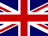
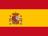

In [5]:
print(soup.prettify())

In [6]:
soup.find_all(class_="contributor__name-content")

[<div class="contributor__name-content" data-v-c5a99f5a="">marcel__hirscher</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">bundesheer.online</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">ski_austria_alpin_herren</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">mastersofdirt</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">lk_practice</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">yogadate.mit.michi</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">viorel77</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">connysporrer</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">renekoch</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">herzerl10</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">jagatgururavidassji1</div>,
 <div class="contributor__name-content" data-v-c5a99f5a="">austriaclimbing</div>,
 <div class="contributor_

In [7]:
data_list = [] 
for j in ['germany', 'austria', 'switzerland']:
    for i in range(1, 3):
        for k in ['trainers-coaches', 'water-sports', 'winter-sports']:
            url = f'https://hypeauditor.com/top-instagram-{k}-{j}/?p={i}'
            page = requests.get(url)
            soup = BeautifulSoup(page.content, 'html.parser')
            
            contributors = soup.find_all('div', class_='contributor__name-content')
            followers = soup.find_all('div', class_='row-cell subscribers')
            countries = soup.find_all('div', class_='row-cell audience')
            auths = soup.find_all('div', class_='row-cell authentic')
            engs = soup.find_all('div', class_='row-cell engagement')
    
            for contributor, follower, country, auth, eng in zip(contributors, followers, countries, auths, engs):  
                name = contributor.text.strip()
                fl_num = follower.text.strip()
                country_name = country.text.strip()
                avg_auth= auth.text.strip()
                avg_eng = eng.text.strip()
                
                data_list.append({
                    'Contributor': name,
                    'Followers': fl_num,
                    'Country': country_name,
                    'Authentic Avg':avg_auth,
                    'Engagement avaerage':avg_eng,
                })

# After the scraping is done, print out the results
for item in data_list:
    print(item)


{'Contributor': 'alex_reinhardt_official', 'Followers': '5M', 'Country': 'Russia', 'Authentic Avg': '22K', 'Engagement avaerage': '41.1K'}
{'Contributor': 'moweber', 'Followers': '133.6K', 'Country': 'Germany', 'Authentic Avg': '587K', 'Engagement avaerage': '718.1K'}
{'Contributor': 'antoniaelena.official', 'Followers': '1.1M', 'Country': 'Germany', 'Authentic Avg': '70.4K', 'Engagement avaerage': '88.7K'}
{'Contributor': 'dr.sezar.youtube', 'Followers': '1.1M', 'Country': 'Germany', 'Authentic Avg': '22.5K', 'Engagement avaerage': '29.8K'}
{'Contributor': 'growingannanas', 'Followers': '1.5M', 'Country': 'United States', 'Authentic Avg': '10.9K', 'Engagement avaerage': '14.1K'}
{'Contributor': 'dr.tsokos', 'Followers': '601.3K', 'Country': 'Germany', 'Authentic Avg': '8.6K', 'Engagement avaerage': '9.7K'}
{'Contributor': 'timmschinabeck', 'Followers': '288.7K', 'Country': 'Germany', 'Authentic Avg': '14.4K', 'Engagement avaerage': '17.7K'}
{'Contributor': 'bild_fcbayern', 'Followers'

In [8]:
import pandas as pd
import os

In [9]:
df = pd.DataFrame(data_list)

In [10]:
df.columns = ['Name', 'Followers', 'Country', 'Average Authentic', 'Average Engagement'] 

In [11]:
df

,Name,Followers,Country,Average Authentic,Average Engagement
0,alex_reinhardt_official,5M,Russia,22K,41.1K
1,moweber,133.6K,Germany,587K,718.1K
2,antoniaelena.official,1.1M,Germany,70.4K,88.7K
3,dr.sezar.youtube,1.1M,Germany,22.5K,29.8K
4,growingannanas,1.5M,United States,10.9K,14.1K
...,...,...,...,...,...
895,geraldinelivia,33.7K,Switzerland,1.1K,1.2K
896,swissolympicteam,64.5K,Switzerland,514,625
897,blickeishockey,25.1K,Switzerland,1.2K,1.4K
898,qcastellet,59.7K,Switzerland,561,1.3K


In [13]:
csv_file = r'C:\Users\DELL\Desktop\Youtuber.csv' 
df.to_csv(csv_file, index=False, encoding='utf-8', mode='w', header=True)

print(f"Data has been written to {csv_file}")

Data has been written to C:\Users\DELL\Desktop\Youtuber.csv
